In [ ]:
# Telco Customer Churn Prediction with ML | Random Forest + XGBoost + SHAP Explainability
#1. import necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import shap
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#2. Load Dataset
df = pd.read_csv("/Users/woxacorp./Desktop/Projects/Customer Churn Prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
#3. Basic Exploration
print("Dataset Shape:", df.shape)
print("\nChurn Distribution:\n", df["Churn"].value_counts())

Dataset Shape: (7043, 21)

Churn Distribution:
 No     5174
Yes    1869
Name: Churn, dtype: int64


In [ ]:
#4. drop non informative column
df.drop('customerID', axis=1,inplace=True, )

In [10]:
#5. Handling Missing Values 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace= True)

In [12]:
# 6. Encoding Categorical Variables
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    if df[col].nunique() == 2:
        df[col] = le.fit_transform(df[col])
    else:
        df= pd.get_dummies(df, columns=[col], drop_first= True)

In [13]:
#7.  Feature & Target Split
X = df.drop('Churn', axis=1)
y = df['Churn'] 

#8. Train Test Split & Scaling
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
#9. Random Forest - Model Training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=42)

In [15]:
#10. XGboost - Model Training
xgb_model = XGBClassifier(use_label_encoder= False, eval_metric= 'logloss', random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [16]:
#11. Evaluation Function
def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(f"\n{name} Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
    print(f"\n{name} Classification Report: \n", classification_report(y_test, y_pred))  

In [19]:
#12. Evaluate Models
evaluate_model("Random Forest", rf_model)
print("-----------------------------------------------------------") 
evaluate_model("XGBoost", xgb_model)


Random Forest Accuracy: 0.7870

Random Forest Confusion Matrix: 
 [[3740  390]
 [ 808  687]]

Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      4130
           1       0.64      0.46      0.53      1495

    accuracy                           0.79      5625
   macro avg       0.73      0.68      0.70      5625
weighted avg       0.77      0.79      0.77      5625

-----------------------------------------------------------

XGBoost Accuracy: 0.7781

XGBoost Confusion Matrix: 
 [[3618  512]
 [ 736  759]]

XGBoost Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      4130
           1       0.60      0.51      0.55      1495

    accuracy                           0.78      5625
   macro avg       0.71      0.69      0.70      5625
weighted avg       0.77      0.78      0.77      5625



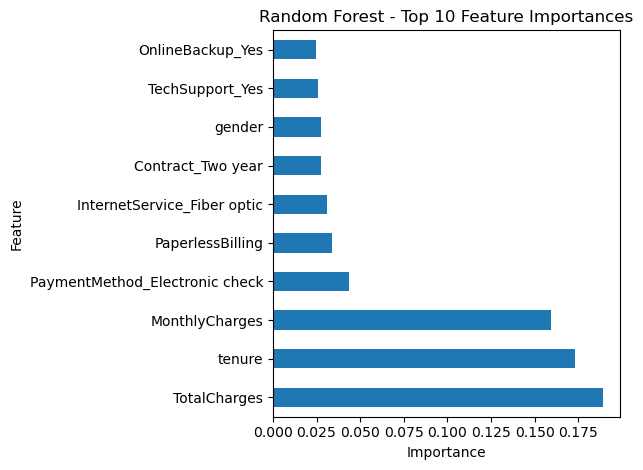

In [21]:
#13. Random Forest-Feature Importance Plot
importances =  rf_model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({"Feature": features, "Importance": importances})
feat_df.sort_values(by="Importance", ascending = False).head(10).plot(kind= "barh", x="Feature", y="Importance", legend= False)
plt.title('Random Forest - Top 10 Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

Calculating SHAP values for XGBoost Model 


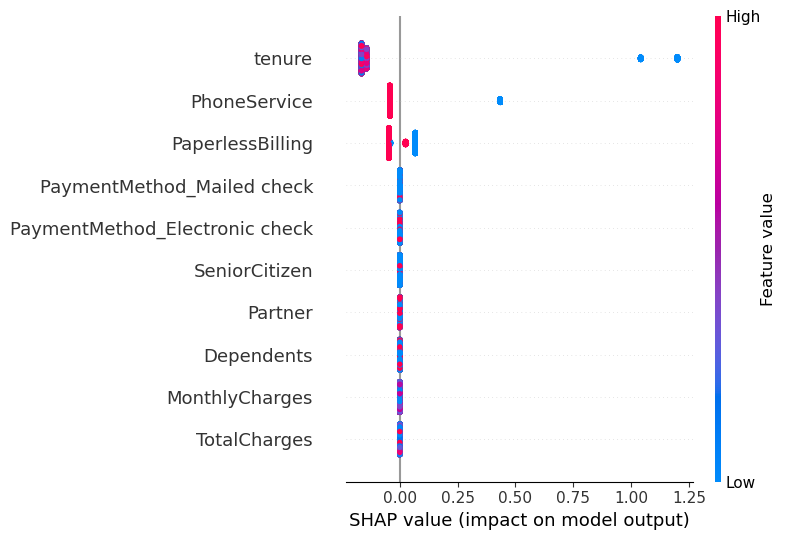

In [22]:
#14. Shap Values for XG model boost 
print("Calculating SHAP values for XGBoost Model ")
explainer = shap.Explainer(xgb_model, X)
shap_values = explainer(X)

shap.summary_plot(shap_values, X, max_display=10)